<a href="https://colab.research.google.com/github/YasirKhan1811/YasirKhan1811.github.io/blob/main/Analyzing_Police_Activity_in_Rhode_Island.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of Traffic Police Activity in Rhode Island

---



---



This project is a complete data analysis of the *traffic stops by police officers data* that was collected by **Stanford Open Policing** project.

The data analysis process includes:
- Data Preparation (Data Cleaning)
- Exploratory Data Analysis

Specifically, it involves cleaning messy data, creating visualizations, combining and reshaping datasets, and manipulating time series data.

The dataset is sourced from the website of [Stanford Open Policing Project](https://openpolicing.stanford.edu/). Primarily, this website hosts traffic stops data of 32 US states. However, I focus my attention on analyzing police behaviour during the traffic stops of Rhode Island.

## Data set Import and the First Glances
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import data set
import pandas as pd

# define path to the csv file
path = '/content/drive/MyDrive/Colab Notebooks/Projects/traffic_stops.csv'

# load the dataset and assign it to ri (stands for Rhode Island)
ri = pd.read_csv(path)

# show first 5 observations
ri.head()

,Unnamed: 0,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [3]:
ri.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [4]:
print("Total no. of observations in the dataset:", ri.shape[0])
print("Total no. of attributes in dataset:", ri.shape[1])

Total no. of observations in the dataset: 91741
Total no. of attributes in dataset: 15


In [5]:
ri.index

RangeIndex(start=0, stop=91741, step=1)

In [6]:
ri.columns

Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')

## 01 - Preparing the Data for Analysis
---

In [7]:
# quick summary of our data set
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [8]:
# number of nan values in each column
nulls = ri.isnull().sum()

# no. of observations
rows = ri.shape[0]

# fraction of null/nan values in each column
print(((nulls/rows)*100).round(0))

state                   0.0
stop_date               0.0
stop_time               0.0
county_name           100.0
driver_gender           6.0
driver_race             6.0
violation_raw           6.0
violation               6.0
search_conducted        0.0
search_type            96.0
stop_outcome            6.0
is_arrested             6.0
stop_duration           6.0
drugs_related_stop      0.0
district                0.0
dtype: float64


The **country_name** column has 100% of its data consists of NaN entries (missing data)

### 1.1 Removing NaN values

Following 6 columns that have no nan entries:
- state
- stop_date
- stop_time
- search_conducted
- drugs_related_stop
- district

The **county_name** column has all of its data missing/nan/null, so this column needs to be dropped.

Columns that have small fractions of data missing (6%). It's normal, so either we remove those rows containing **nan** values or they can be imputed accordingly:
- driver_gender
- driver_race
- violation_raw
- violation
- stop_outcome
- is_arrested
- stop_duration

In [9]:
# dropping off county_name column from the dataframe, since it has no non-null values
ri.drop(['county_name'], axis = 1, inplace=True)
ri.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


Since we have large data (i.e. total 91741 instances), where the rows having **nan** entries are just **6%**, so those observations can be dropped off. Still there will be enough data left for analysis. Imputing can be done when null entries are between 10%-40%, and where dropping rows would cause losing a lot of data.

In [10]:
# Mathematically
print('Fraction of data (NaN entries) to be dropped off:', round((91741 - (1 - 0.06) * 91741)/91741, 2))

Fraction of data (NaN entries) to be dropped off: 0.06


In [11]:
# drop rows that contain NaN entries
ri.dropna(subset=['driver_gender', 'driver_race', 'violation_raw', 'violation', 'stop_outcome', 'is_arrested', 'stop_duration'], inplace=True)

# view the no. of null entries by column
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [12]:
print('Shape of the data:', ri.shape)

Shape of the data: (86536, 14)


In [13]:
ri.search_type.unique()

array([nan, 'Probable Cause', 'Incident to Arrest',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Probable Cause,Protective Frisk,Reasonable Suspicion',
       'Reasonable Suspicion', 'Incident to Arrest,Protective Frisk',
       'Inventory,Protective Frisk', 'Inventory',
       'Incident to Arrest,Inventory', 'Inventory,Probable Cause',
       'Protective Frisk,Reasonable Suspicion',
       'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable 

The **search_type** column contains values of the kind of search conducted during a stop, and it has values only when the search was conducted. When the search was not conducted (i.e. False), the **search_type** column bears NaN entries. Therefore, we cannot drop this column, neither can we remove its NaN entries. So lets leave it as this for now.

### 1.2 Converting the data types (using proper data types)

In [14]:
# data types of the corresponding attributes
ri.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [15]:
# following list of columns need to be in boolean
bool_cols = ['search_conducted', 'is_arrested', 'drugs_related_stop']

for i in bool_cols:
  ri[i].astype('bool')


ri[bool_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   search_conducted    86536 non-null  bool  
 1   is_arrested         86536 non-null  object
 2   drugs_related_stop  86536 non-null  bool  
dtypes: bool(2), object(1)
memory usage: 1.5+ MB


The **is_arrested** column did not convert to bool data type.

### 1.3 Working with Time Series Data

In [16]:
# viewing stop_date and stop_time columns of the dataframe
ri[['stop_date', 'stop_time']].head(3)

,stop_date,stop_time
0,2005-01-04,12:55
1,2005-01-23,23:15
2,2005-02-17,04:15


In [17]:
# checking data types
ri[['stop_date', 'stop_time']].dtypes

stop_date    object
stop_time    object
dtype: object

Combine the **stop_date** and **stop_time** columns into one, and then change its data type to datetime format

In [18]:
# combine the two columns into one, and then add that combined column in the dataframe
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')

# change data type of the combined column and add it to the dataframe as a new column (date_and_time)
ri['date_and_time'] = pd.to_datetime(combined)

In [19]:
# now check the final data types
ri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   state               86536 non-null  object        
 1   stop_date           86536 non-null  object        
 2   stop_time           86536 non-null  object        
 3   driver_gender       86536 non-null  object        
 4   driver_race         86536 non-null  object        
 5   violation_raw       86536 non-null  object        
 6   violation           86536 non-null  object        
 7   search_conducted    86536 non-null  bool          
 8   search_type         3307 non-null   object        
 9   stop_outcome        86536 non-null  object        
 10  is_arrested         86536 non-null  object        
 11  stop_duration       86536 non-null  object        
 12  drugs_related_stop  86536 non-null  bool          
 13  district            86536 non-null  object    

In [20]:
# Set the date_and_time column as the index to make it easy for data filteration and data visualization w.r.t time
ri.set_index('date_and_time', inplace = True)
ri.head(3)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
date_and_time,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


All the missing data removed and the data types correctly formatted. Now, it's time for data analysis.

## 02 - Exploring the Data (analyzing the relationship between gender and policing)

---



We may answer the following question:
- Does the gender of a driver have an impact on police behavior during a traffic stop?

### 2.1 Examining traffic violations

In [21]:
# percent violations by type
round(ri.violation.value_counts(normalize=True)*100)

Speeding               56.0
Moving violation       19.0
Equipment              13.0
Other                   5.0
Registration/plates     4.0
Seat belt               3.0
Name: violation, dtype: float64

56% of the violations are due to Speeding, followed by Moving violation (19%) and then by Equipment (13%).

### 2.2 Comparing violations by gender

How each gender commit violations?

In [22]:
# Create a DataFrame of female drivers
female = ri[ri['driver_gender'] == 'F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender'] == 'M']

In [23]:
# Compute the violations by female drivers (as proportions)
violations_by_females = round(female.violation.value_counts(normalize=True)*100, ndigits=0)

print(violations_by_females)

Speeding               66.0
Moving violation       14.0
Equipment              11.0
Registration/plates     4.0
Other                   3.0
Seat belt               2.0
Name: violation, dtype: float64


In [24]:
# Compute the violations by male drivers (as proportions)
violations_by_males = round(male.violation.value_counts(normalize=True)*100, ndigits=0)

print(violations_by_males)

Speeding               52.0
Moving violation       21.0
Equipment              13.0
Other                   6.0
Registration/plates     4.0
Seat belt               4.0
Name: violation, dtype: float64


In [25]:
# stop outcome as a result of speeding for male drivers
male[male['violation']=='Speeding'].stop_outcome.value_counts(normalize=True)*100

Citation            94.459530
Warning              3.618391
Arrest Driver        1.589529
Arrest Passenger     0.128139
No Action            0.106782
N/D                  0.097629
Name: stop_outcome, dtype: float64

In [26]:
# stop outcome as a result of speeding for female drivers
female[female['violation']=='Speeding'].stop_outcome.value_counts(normalize=True)*100

Citation            95.219225
Warning              4.007414
Arrest Driver        0.575227
N/D                  0.095871
Arrest Passenger     0.063914
No Action            0.038348
Name: stop_outcome, dtype: float64

The outcomes because of Speeding violations for both Male and Female drivers are in the same proportions. We can conclude that police behaviour is neutral in case of speeding violation.

### 2.3 How does the gender affect whose vehicle is searched?

In [27]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

Out of total searches conducted, male drivers were searched 4.5%, whereas female drivers were searched only about 2%.

### 2.4 Does the gender affect who is frisked during a search?

In [28]:
# how many times search was conducted?
searches = ri.search_conducted.value_counts()
searches

False    83229
True      3307
Name: search_conducted, dtype: int64

Out of total traffic stops, only 3307 searches were conducted. Therefore, the 83229 no. of NaN entries in the **search_type** column mean that the search was not conducted, hence these entries correspond to missing data.

In [29]:
# what kind of searches were conducted? 
ri.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [30]:
# instances when one type of search was conducted during a traffic stop
ri.search_type.value_counts().iloc[0:5]

Incident to Arrest      1290
Probable Cause           924
Inventory                219
Reasonable Suspicion     214
Protective Frisk         164
Name: search_type, dtype: int64

The above result shows unique search types. The rest of the searches included more than one search types.

Let's analyze the **search_type**, during which inventory was taken by the police.

In [31]:
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False) 

This will bring out all the search types in which inventory was the only search type as well as the search types, where inventory was one of other search types.

In [32]:
# check the data type
ri['inventory'].dtype

dtype('bool')

The data type is boolean, so we can determine the percentage of searches that had inventory as a search type.

In [33]:
print("{} % of the searches conducted included inventory".format(round(ri[ri['search_conducted'] == True].inventory.mean(), ndigits=3)*100))

13.3 % of the searches conducted included inventory


### 2.5 Counting protective frisks

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

So, lets determine the frisk rate.

In [34]:
# kinds of search types
ri.search_type.unique()

array([nan, 'Probable Cause', 'Incident to Arrest',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Probable Cause,Protective Frisk,Reasonable Suspicion',
       'Reasonable Suspicion', 'Incident to Arrest,Protective Frisk',
       'Inventory,Protective Frisk', 'Inventory',
       'Incident to Arrest,Inventory', 'Inventory,Probable Cause',
       'Protective Frisk,Reasonable Suspicion',
       'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable 

In [35]:
# make a new column "frisk", which contains only the entries when driver was frisked
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

print("{} % of the searches included Protective Frisk".format(round(ri[ri.search_conducted == True].frisk.mean(), ndigits=3)*100))

9.2 % of the searches included Protective Frisk


### 2.6 Comparing frisk rates by gender

**Are male drivers frisked more often than female drivers?** 
Perhaps because police officers consider male drivers to be higher risk.

In [36]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
overall_frisk = searched.frisk.mean()

# Calculate the frisk rate for each gender
frisk_rate = searched.groupby('driver_gender')['frisk'].mean()/overall_frisk
print(frisk_rate)

driver_gender
F    0.813777
M    1.029785
Name: frisk, dtype: float64


Male drivers were frisked at a slightly higher rate than the female drivers.

## 03 - Visual Data Exploration
---

### 3.1 Does time of day affect arrest rate?

In [37]:
# over_all arrests
overall_arrests = ri.is_arrested.mean()

# hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()/overall_arrests

Plotting hourly arrest rate

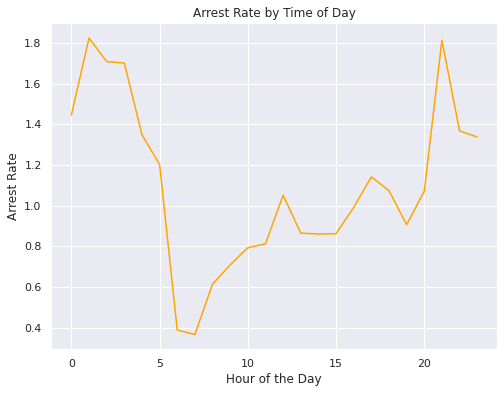

In [38]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# use seaborn style
sns.set_theme()

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot(color='orange', figsize=(8,6))

# Add the xlabel, ylabel, and title
plt.xlabel('Hour of the Day')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

The arrest rate is significantly on hike during the night time, lowest in the early morning, while it's moderate from noon to evening.

### 3.2 Are drug related stops on the rise?

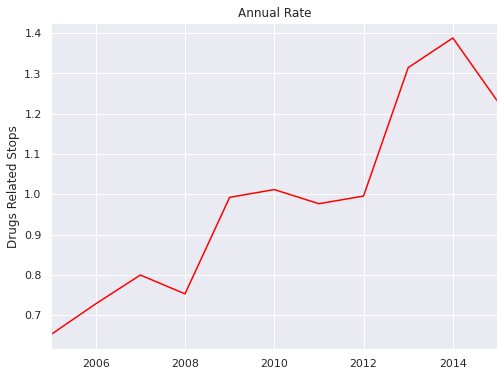

In [39]:
# annual drugs related stops
annual_drug_related_stops = ri.drugs_related_stop.resample('A').mean()/ri.drugs_related_stop.mean()

# use seaborn style
sns.set_style('darkgrid')

# plot the annual rate of drugs found
annual_drug_related_stops.plot(color='red', figsize=(8,6))

# Add the xlabel, ylabel, and title
plt.xlabel(None)
plt.ylabel('Drugs Related Stops')
plt.title('Annual Rate')

# Display the plot
plt.show()

This implies that the rate of drugs related stops is increasing annually.

However, this may also be true that the number of searches being conducted also increased from 2005 to 2015, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs. To check whether this hypothesis holds true, let us plot annual search rate and compare rate of drug-related stops with annual search rate.

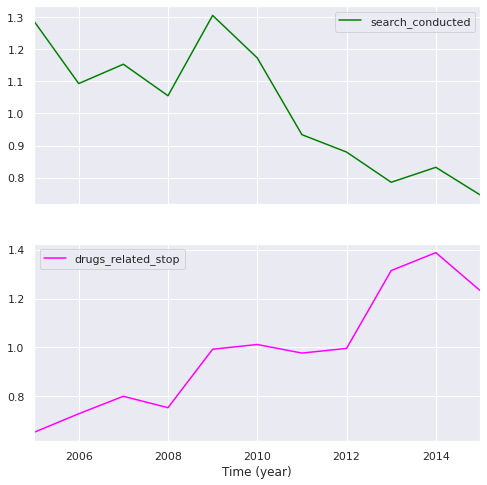

In [40]:
# annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()/ri.search_conducted.mean()

# set style
sns.set_style('darkgrid')

# concatenate annual_search_rate and annual drug_related stops
comparison = pd.concat([annual_search_rate, annual_drug_related_stops], axis='columns')

# plot annual rate of drugs found in comparison with rate of searches conducted
comparison.plot(subplots=True, color=['green', 'magenta'], figsize=(8,8))

plt.xlabel('Time (year)')

# Display the plot
plt.show()

From the above visual, it is evident that drugs related stops are increasing annually with a decrease in annual search rate. 

### 3.3 How many violations are caught in each district?

In [41]:
# frequency table
freq_table = pd.crosstab(ri.district, ri.violation)

# frequency of violation type in each district
freq_table

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


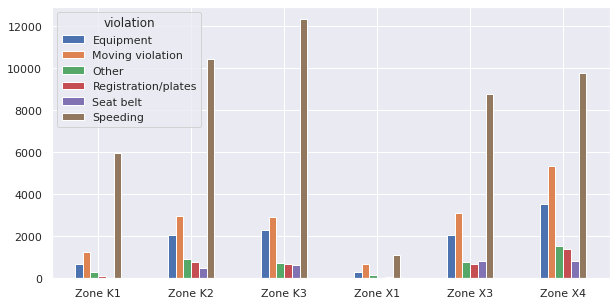

In [42]:
# bar chart of how often a violation was committed in each district
# set seaborn style
sns.set_style('darkgrid')

# code for bar plot
freq_table.plot(kind='bar', figsize=(10,5), rot=0)

# remove unnecessary labels
plt.xlabel(None)

# show
plt.show()

Most of the violations are due to speeding. Whereas, violations of seat belt are rare in all districts.

### 3.4 How many searches were conducted by violation?

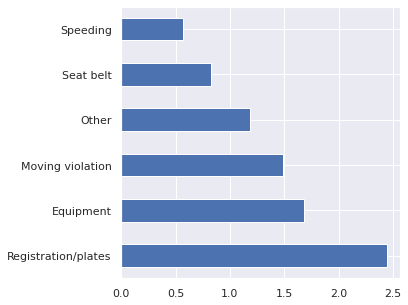

In [43]:
# code
search_rate_by_violation = (ri.groupby('violation').search_conducted.mean()/ri.search_conducted.mean()).sort_values(ascending=False)

# plot
search_rate_by_violation.plot(kind='barh', figsize=(5,5))

# remove unnecessary labels
plt.ylabel(None)

# show
plt.show()

Search rate is the highest in case of **Registration/plates** violation.

### 3.5 Average stop duration by violation type

In [44]:
# data types of the stop_duration column
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

These values are hard to analyze and illustrate. Therefore, for making meaningful and easy to understand visuals, we need to convert these values into corresponding integers.

In [45]:
# make a dictionary for mapping the stop_duration values
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# now replace the stop_duration column values by the above assigned values in the dictionary
ri['stop_mins'] = ri.stop_duration.map(mapping)

# view the stop duration values in terms of integers
ri['stop_mins'].unique()

array([ 8, 23, 45])

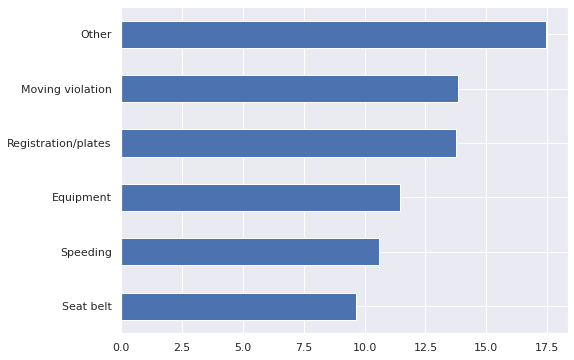

In [46]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
stop_length = ri.groupby('violation')['stop_mins'].mean().sort_values()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.plot(kind='barh', figsize=(8,6))

# remove unnecessary labels
plt.ylabel(None)

# Display the plot
plt.show()

## 4 - Effect of Weather Condition on Police Activity in Rhode Island
---

In [47]:
# first import the weather dataset

# set path to the dataset location
path_to_weather = '/content/drive/MyDrive/Colab Notebooks/Projects/weather.csv'

# read the data in csv
weather = pd.read_csv(path_to_weather)

# View the first few observations
weather.head(3)

,Unnamed: 0,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions,rating
0,0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2,bad
1,1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16,2,bad
2,2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9,3,bad


In [48]:
weather.drop(['Unnamed: 0'], axis=1,inplace=True)

In [49]:
weather.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions,rating
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2,bad
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16,2,bad
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9,3,bad


This historical weather data (2005 - 2015) of Rhode Island was imported from [National Centers for Environmental Information](https://www.ncei.noaa.gov/). Since the traffic stops data does not provide the coordinates of stops, therefore, we will use the weather data of central station in Rhode Island, which is in close approximation to the stop locations data because Rhode Island is the smallest US State. 

This data will help us analyze the effect of different weather conditions on police behaviour during traffic stops.

First, let's check whether the data is trustworthy. For that we will follow the following steps:
- Check summary statistics
- Visualize the spread of the variables (wind speed and temperature values) through Boxplots and Histograms

### 4.1 Examining the wind speed

AWND: Average wind speed\
WSF2: Fastest wind speed in a day for 2 minutes


In [50]:
weather[['AWND', 'WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


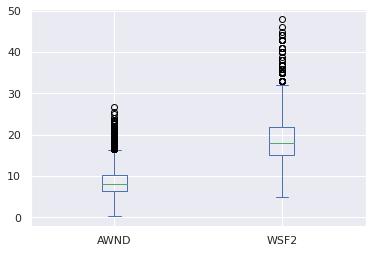

In [51]:
# boxplots
weather[['AWND', 'WSF2']].plot(kind='box')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1d3de1a50>,
      dtype=object)

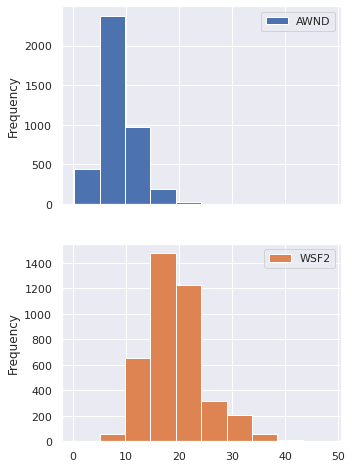

In [52]:
# histograms
weather[['AWND', 'WSF2']].plot(kind='hist', subplots=True, figsize=(5,8))

Wind speed data are normally distributed.

### 4.2 Examining Temperatures
TAVG: Average temperature\
TMIN: Minimum temperature\
TMAX: Maximum temperature

In [53]:
# Describe the temperature columns
weather[['TAVG', 'TMIN', 'TMAX']].describe()

,TAVG,TMIN,TMAX
count,1217.000000,4017.000000,4017.000000
mean,52.493016,43.484441,61.268608
std,17.830714,17.020298,18.199517
min,6.000000,-5.000000,15.000000
25%,39.000000,30.000000,47.000000
50%,54.000000,44.000000,62.000000
75%,68.000000,58.000000,77.000000
max,86.000000,77.000000,102.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


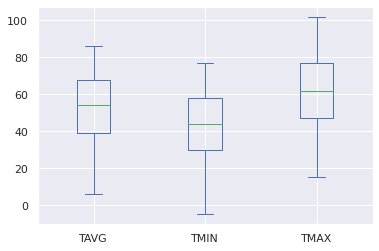

In [54]:
# Create a box plot of the temperature columns
weather[['TAVG', 'TMIN', 'TMAX']].plot(kind='box')

In [55]:
# histogram of temperature difference column
# first create TDIFF column (temperature difference between max. temperature and min. temperature)
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

weather['TDIFF'].describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

To visualize the summary statistics, let's build a boxplot.

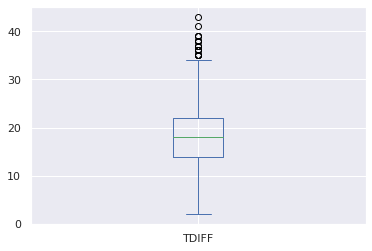

In [56]:
weather['TDIFF'].plot(kind='box')

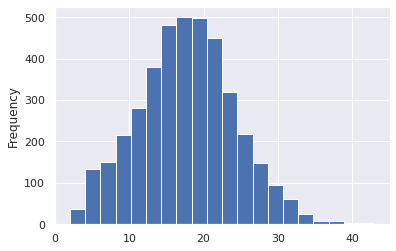

In [57]:
weather['TDIFF'].plot(kind='hist', bins=20)

The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

### 4.3 Categorizing the weather

In [58]:
# selecting a dataframe slice
temp = weather.loc[:, 'TAVG':'TMAX']
temp.head(3)

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53


First we map the stop_duration values in categrical order, so the logical operations can be applied for comparison

In [59]:
ri['stop_duration'].unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [60]:
# mapping
mapping = {'0-15 Min':'short', '16-30 Min': 'medium', '30+ Min': 'long'}

ri['stop_length'] = ri.stop_duration.map(mapping)

ri['stop_length'].unique()

array(['short', 'medium', 'long'], dtype=object)

Now lets convert this object data type into **ordered categories**. There are two benefits for this:
1. Category type stores the data more efficiently
2. Allows to apply logical operations on ordered categories

In [61]:
# check memory usage of object dtype 
ri.stop_length.memory_usage(deep=True)

6068041

The stop_length column data occupies **6 MB space** as shown above

In [62]:
# convert to category dtype
cats = pd.CategoricalDtype(['short', 'medium', 'long'], ordered=True)

ri['stop_length'] = ri['stop_length'].astype(cats)

# now check the memory usage of categorical dtype 
ri.stop_length.memory_usage(deep=True)

779118

The memory space reduced to less than **1 MB** (0.78 MB) for the **stope_length** column data.

In [63]:
# using ordered categories
ri.stop_length.head(5)

date_and_time
2005-01-04 12:55:00     short
2005-01-23 23:15:00     short
2005-02-17 04:15:00     short
2005-02-20 17:15:00    medium
2005-02-24 01:20:00     short
Name: stop_length, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [64]:
# apply logical operation
ri[ri.stop_length > 'short']['stop_length'].head(5) # only contains medium and long stop lengths

date_and_time
2005-02-20 17:15:00    medium
2005-09-11 00:10:00      long
2005-10-01 22:00:00      long
2005-10-01 22:40:00    medium
2005-10-01 22:40:00    medium
Name: stop_length, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

### 4.4 Which stop duration corresponds to higher arrest rate? 

Text(0.5, 1.0, 'Arrest Rate By Stop Duration')

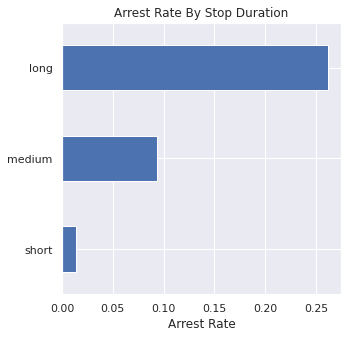

In [65]:
# set seaborn style
sns.set_style('darkgrid')

# plot
ri.groupby('stop_length').is_arrested.mean().plot(kind='barh', figsize=(5,5))

# labeling the axis
plt.xlabel('Arrest Rate')
plt.ylabel(None)
plt.title('Arrest Rate By Stop Duration')

Chances that driver will be arrested are higher in the longest stop duration.

### 4.5 Counting bad weather conditions

The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

- WT05 indicates "Hail"
- WT11 indicates "High or damaging winds"
- WT17 indicates "Freezing rain"

For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

We can add a new column, **bad_conditions**, that sums up all the bad weather conditions through that day. Basically, summing up all the bad weather values (i.e. 1) in each row. 

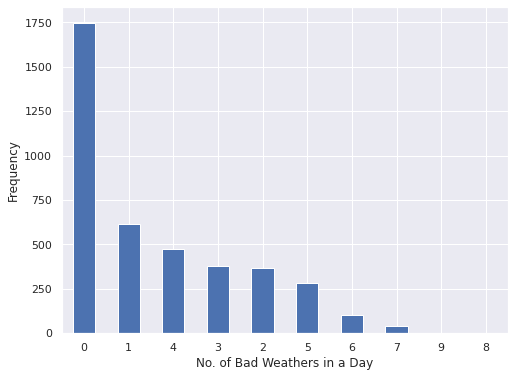

In [66]:
# Copy 'WT01' through 'WT22' from weather to from a new DataFrame "WT"
WT = weather.loc[:, 'WT01':'WT22']

# Replace NaN values in WT dataframe with '0'
WT = WT.fillna(0).astype('int')

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Create a count plot to count the number of 'bad_conditions'
weather['bad_conditions'].value_counts().plot(kind='bar', rot=0, figsize=(8,6))

# set the labels
plt.xlabel('No. of Bad Weathers in a Day')
plt.ylabel('Frequency')

# Display the plot
plt.show()

0 means no bad weather, and it counts for 1750 no. of days from 2005 to 2015.

### 4.6 Rating the weather conditions

Above, we counted the number of bad weather conditions each day. Now lets use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

- 0 to 'good'
- 1 through 4 to 'bad'
- 5 through 9 to 'worse'

In [67]:
# Count the unique values in 'bad_conditions' column and sort by index
weather.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [68]:
# Create a dictionary that maps integers to strings
mapping = {0: 'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9: 'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [69]:
# check the data type
weather['rating'].dtype

dtype('O')

Since the rating column only has a few possible values, we will change its data type to category in order to store the data more efficiently. Then we'll also specify a logical order for the categories.

In [70]:
# Specify the logical order of the weather ratings
cats = pd.CategoricalDtype(['good', 'bad', 'worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)

# Examine the head of 'rating'
print(weather['rating'].head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


Since the two dataframes **(ri and weather)** are ready, lets join them to analyze the effect of weather condition on police behaviour during traffic stops. We will check to see how is the arrest rate affected during different weather conditions.

In [71]:
# first reset the index of ri dataframe as column
ri.reset_index(inplace=True)

In [72]:
# Create a DataFrame from the 'DATE' and 'rating' columns of weather
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


Merge "weather_rating" with the "ri" on stop_date and DATE columns

In [73]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
ri_weather.head(3)

,date_and_time,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,...,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk,stop_mins,stop_length,DATE,rating
0,2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,...,False,0-15 Min,False,Zone X4,False,False,8,short,2005-01-04,bad
1,2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,...,False,0-15 Min,False,Zone K3,False,False,8,short,2005-01-23,worse
2,2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,...,False,0-15 Min,False,Zone X4,False,False,8,short,2005-02-17,good


In [74]:
# view the last 3 rows
ri_weather.tail(3)

,date_and_time,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,...,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk,stop_mins,stop_length,DATE,rating
86533,2015-12-31 22:04:00,RI,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,...,False,0-15 Min,False,Zone X3,False,False,8,short,2015-12-31,bad
86534,2015-12-31 22:09:00,RI,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,...,False,0-15 Min,False,Zone K3,False,False,8,short,2015-12-31,bad
86535,2015-12-31 22:47:00,RI,2015-12-31,22:47,M,White,Registration Violation,Registration/plates,False,NaN,...,False,0-15 Min,False,Zone X4,False,False,8,short,2015-12-31,bad


In [75]:
# Now set the 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('date_and_time', inplace=True)

### 4.7 Does weather affect the arrest rate?

In [76]:
# driver gender and vehicle searches
search_rate = ri_weather.groupby(['violation','driver_gender']).search_conducted.mean()
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

This is not a dataframe. Instead, it's a Pandas series with two level indexes (outer index = violation, inner index = driver_gender). Let's convert this series into a Pandas dataframe. 

In [77]:
type(search_rate)

pandas.core.series.Series

In [78]:
type(search_rate.index)

pandas.core.indexes.multi.MultiIndex

In [79]:
# Converting a multi-indexed Series to a DataFrame
search_rate.unstack()

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [80]:
type(search_rate.unstack())

pandas.core.frame.DataFrame

### 4.8 Do police officers arrest drivers more often when the weather is bad?

In [81]:
# Calculate the arrest rate for each 'violation' and 'rating'
arrest_rate_ = round(ri_weather.groupby(['violation', 'rating']).is_arrested.mean()*100, ndigits=2)
arrest_rate_

violation            rating
Equipment            good       5.90
                     bad        6.63
                     worse      9.74
Moving violation     good       5.62
                     bad        5.80
                     worse      6.59
Other                good       7.70
                     bad        8.74
                     worse      6.29
Registration/plates  good       8.16
                     bad        9.82
                     worse     11.56
Seat belt            good       2.86
                     bad        2.25
                     worse      0.00
Speeding             good       1.34
                     bad        1.33
                     worse      1.69
Name: is_arrested, dtype: float64

In [82]:
# convert the above series into a dataframe
arrest_rate_df = arrest_rate_.unstack()
arrest_rate_df

rating,good,bad,worse
violation,,,
Equipment,5.90,6.63,9.74
Moving violation,5.62,5.80,6.59
Other,7.70,8.74,6.29
Registration/plates,8.16,9.82,11.56
Seat belt,2.86,2.25,0.00
Speeding,1.34,1.33,1.69


Text(0, 0.5, '')

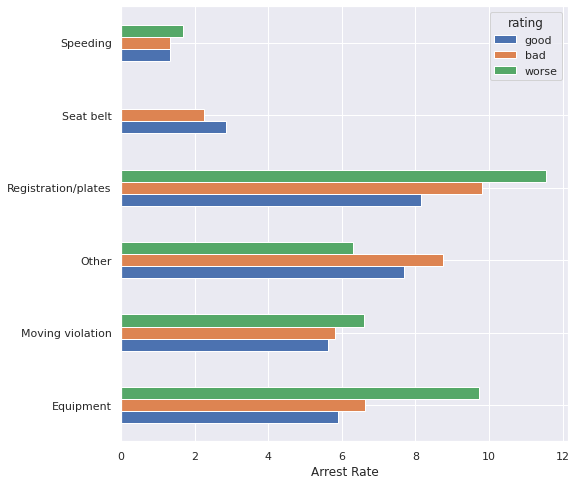

In [83]:
# visualize arrest rate
arrest_rate_df.plot(kind='barh', figsize=(8,8))

# set x-axis label
plt.xlabel('Arrest Rate')

# remove the y-axis label
plt.ylabel(None)

In most of the violations, the arrest rate is surprisingly highest during the worst weather conditions.

## 5 - Key Insights

In this project, police activity in the US sate of Rhode Island was analyzed thoroughly. Mainly the following insights were gathered:

- Affect of driver gender on search rate: male drivers were searched more frequently than the female drivers in the drug related stops, it could be believed that mostly men carry the drugs.

- Types of violations committed by male and female drivers were almost in the same proportion. Speeding was the most commited violation by both genders (around **55%** to **65%)**.

- Surprisingly, the rate of **drugs related stops** surged during this time period provided that the **search rate** significantly decreased by each year.

- Speeding traffic violation was mostly commited by both driver genders.

- The firsk rate was higher amongst the male drivers. It might be that mostly men are thought to be higher risk.

- Moreover, long stop durations corresponded to higher arrest rate. 

- Finally, the weather data stated that during worst weather conditions the arrest rate was significantly higher in **90 %** of the violations.